## Data cleaning and preprocessing
This dataset contains different attributes that aims to predict the presence or absence of CVDs (Cardiovascular Diseases).

These are the attributes : 
ID, age by days, age_years, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio, bmi, bp_category

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import missingno as mis

## I. Explore The Dataset

## 1. Check the structure, missing values, duplicates, unique values

In [2]:
# Load the dataset and check the structure
data = pd.read_csv("Cleveland, Hungary, Switzerland and the Va long Beach.csv")
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

(68205, 17)

In [3]:
#Datset organisation & description
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,68205.0,49972.410498,28852.138290,0.000000,24991.000000,50008.000000,74878.000000,99999.000000
age,68205.0,19462.667737,2468.381854,10798.000000,17656.000000,19700.000000,21323.000000,23713.000000
gender,68205.0,1.348625,0.476539,1.000000,1.000000,1.000000,2.000000,2.000000
height,68205.0,164.372861,8.176756,55.000000,159.000000,165.000000,170.000000,250.000000
weight,68205.0,74.100688,14.288862,11.000000,65.000000,72.000000,82.000000,200.000000
ap_hi,68205.0,126.434924,15.961685,90.000000,120.000000,120.000000,140.000000,180.000000
ap_lo,68205.0,81.263925,9.143985,60.000000,80.000000,80.000000,90.000000,120.000000
cholesterol,68205.0,1.363243,0.678080,1.000000,1.000000,1.000000,1.000000,3.000000
gluc,68205.0,1.225174,0.571288,1.000000,1.000000,1.000000,1.000000,3.000000
smoke,68205.0,0.087662,0.282805,0.000000,0.000000,0.000000,0.000000,1.000000


id                     0
age                    0
gender                 0
height                 0
weight                 0
ap_hi                  0
ap_lo                  0
cholesterol            0
gluc                   0
smoke                  0
alco                   0
active                 0
cardio                 0
age_years              0
bmi                    0
bp_category            0
bp_category_encoded    0
dtype: int64


'mis.heatmap(data)\nplt.show()'

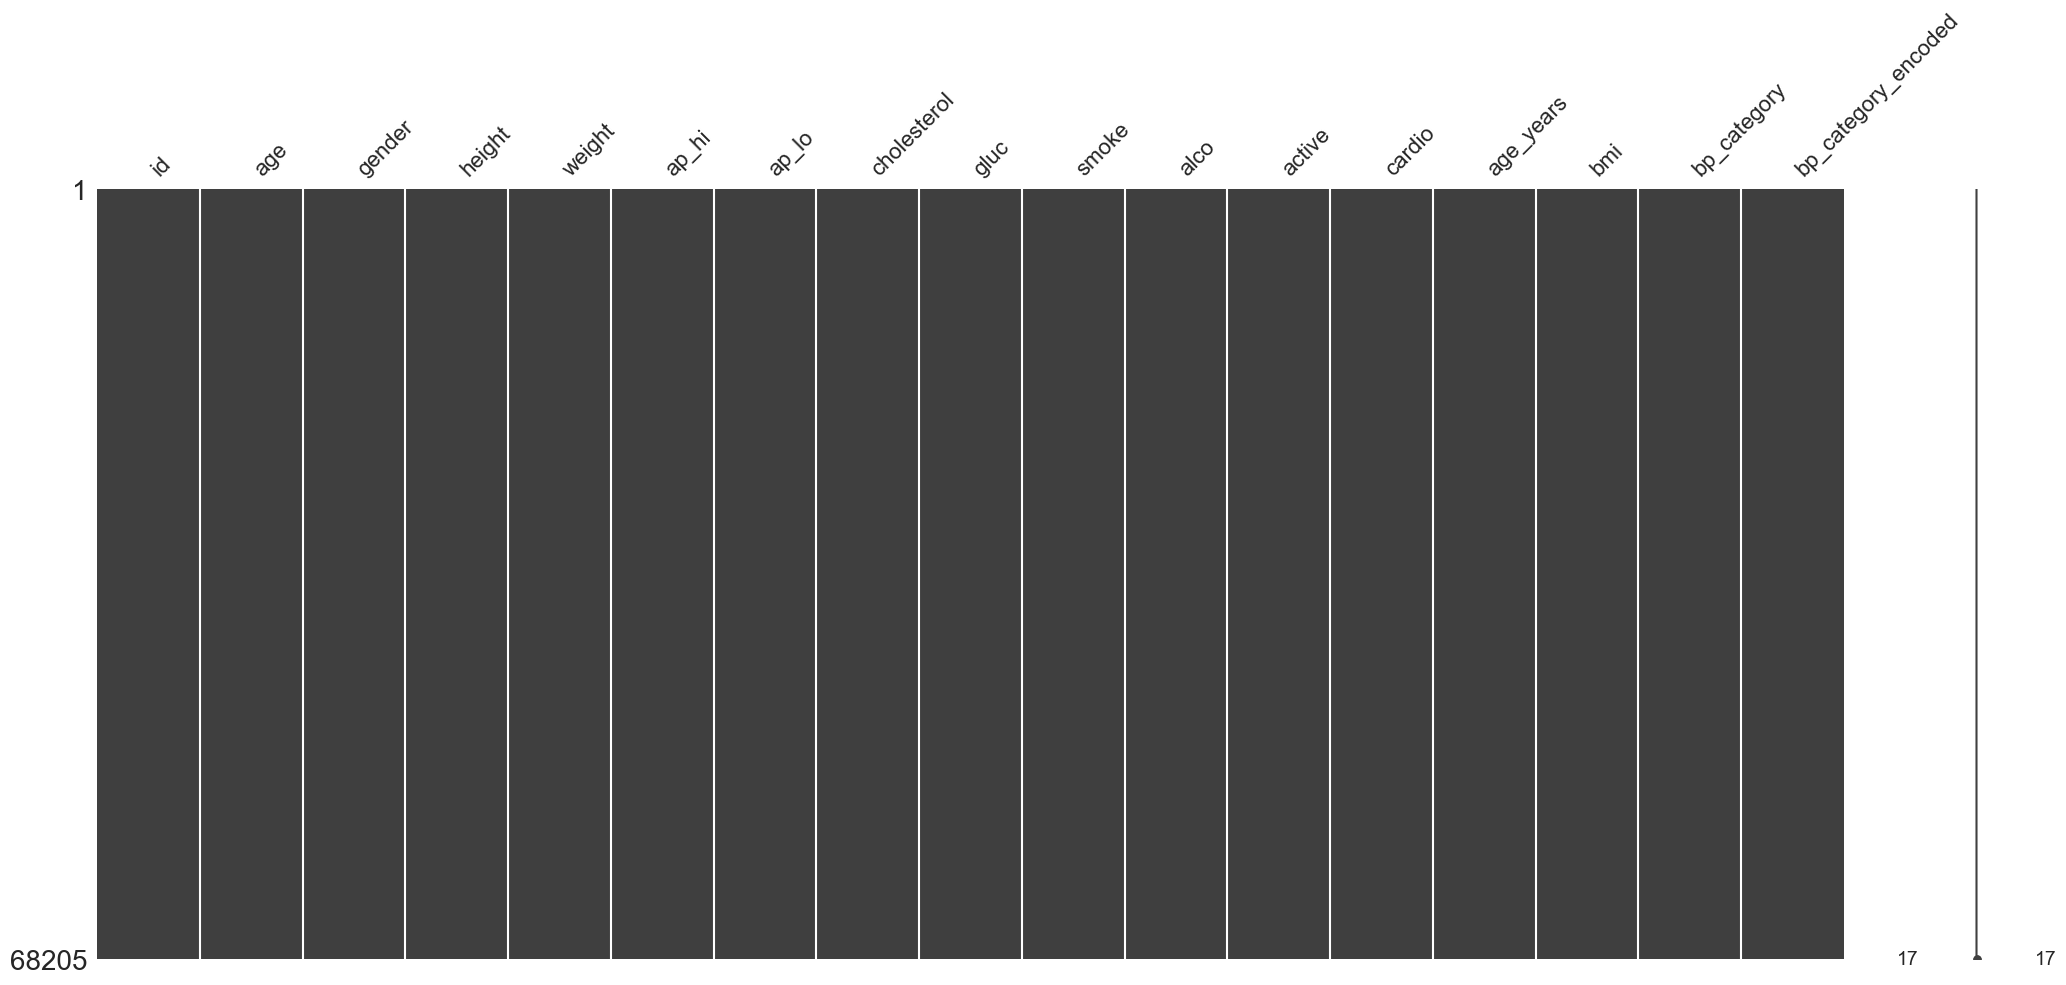

In [4]:
#Looking for missing values
print(data.isnull().sum())
mis.matrix(data)
"""mis.heatmap(data)
plt.show()"""  #with this we can see how a column ios relative to another in terms of missing

In [5]:
#Looking for the number of unique values in each column
data.nunique().reset_index()

,index,0
0,id,68205
1,age,8061
2,gender,2
3,height,106
4,weight,278
5,ap_hi,86
6,ap_lo,58
7,cholesterol,3
8,gluc,3
9,smoke,2


In [6]:
#Looking if the last two columns are the same 
data.iloc[:, -1].equals(data.iloc[:, -2])

True

In [7]:
#Looking for values in Hp-category  
data['bp_category'].unique()

array(['Hypertension Stage 1', 'Hypertension Stage 2', 'Normal',
       'Elevated'], dtype=object)

In [8]:
# Looking for different ages
data['age_years'].unique()

array([50, 55, 51, 48, 47, 60, 61, 54, 40, 39, 45, 58, 59, 63, 64, 53, 49,
       57, 56, 46, 43, 62, 52, 42, 44, 41, 29, 30], dtype=int64)

## 2. Distribution of variables and visualising data

In [9]:
data['bp_category'].value_counts(normalize=True)

Hypertension Stage 1    0.582802
Hypertension Stage 2    0.233663
Normal                  0.138069
Elevated                0.045466
Name: bp_category, dtype: float64

In [10]:
data['gender'].replace({1: 0, 2: 1}, inplace=True)

In [11]:
data['cardio'].replace([0,1], ['No-CVDs', 'CVDs']).value_counts(normalize=True)

No-CVDs    0.506312
CVDs       0.493688
Name: cardio, dtype: float64

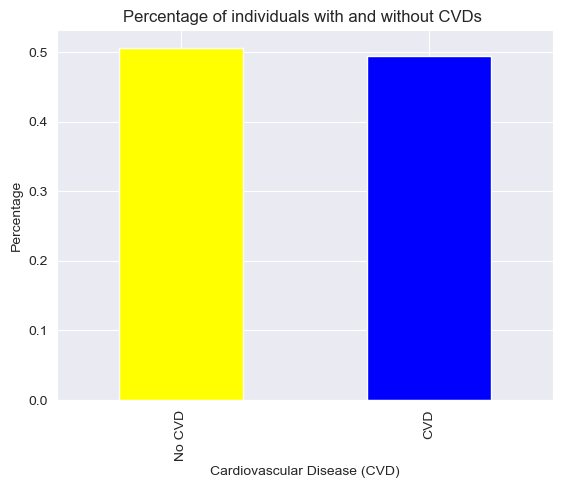

In [12]:
#Percentage of individuals with and without CVDs in my sampling 

#using normalize so it returns a percentage
data['cardio'].value_counts(normalize=True).plot(kind='bar', color=['yellow', 'blue'])

# Creating the bar plot
plt.xlabel('Cardiovascular Disease (CVD)')
plt.ylabel('Percentage')
plt.title('Percentage of individuals with and without CVDs ')
plt.xticks(ticks=[0, 1], labels=['No CVD', 'CVD'])
plt.show()


<AxesSubplot:ylabel='cardio'>

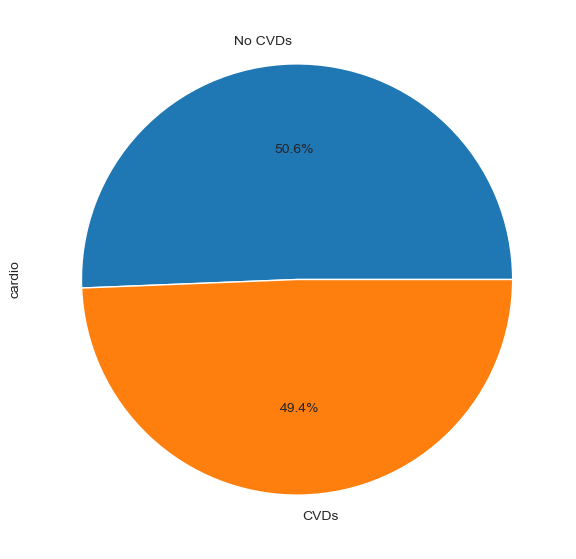

In [13]:
plt.figure(figsize=(10,7))
data['cardio'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['No CVDs', 'CVDs'])

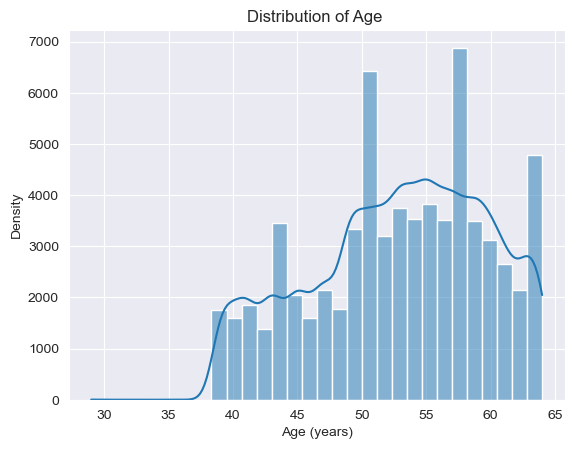

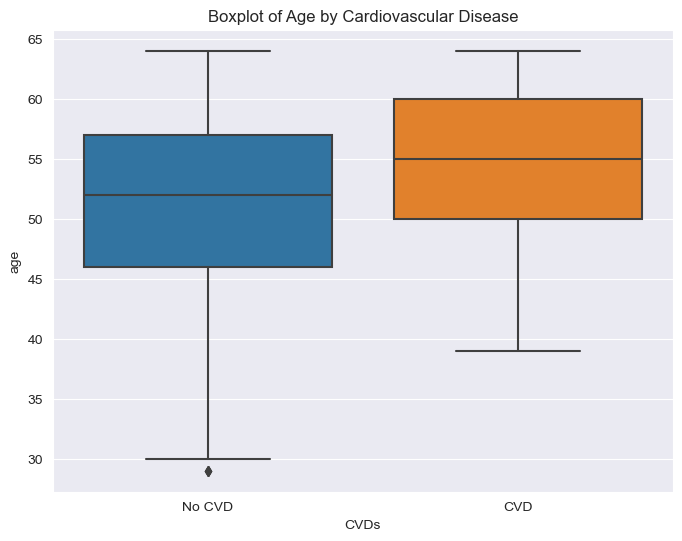

In [14]:
#Histogram about the age of the individuals 
sb.histplot(data['age_years'], kde=True, bins=30)
plt.title('Distribution of Age ')
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.show()

#Boxplot (diagramme à moustache) of age by CVDs
plt.figure(figsize=(8, 6))
sb.boxplot(x='cardio', y='age_years', data=data)
plt.xlabel('CVDs')
plt.ylabel('age')
plt.title('Boxplot of Age by Cardiovascular Disease')
plt.xticks(ticks=[0, 1], labels=['No CVD', 'CVD'])
plt.show()


## 3. Relationships between the variables

<AxesSubplot:>

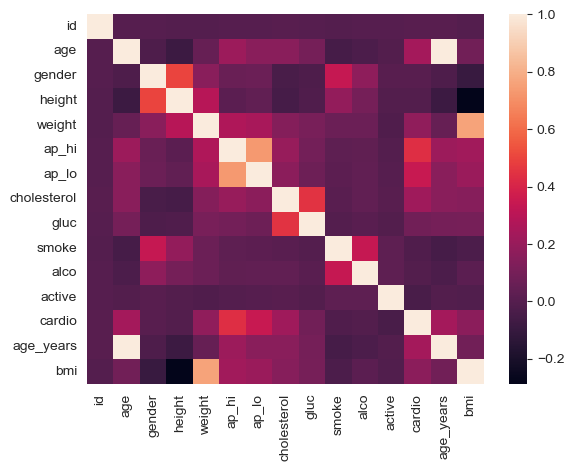

In [15]:
#Correlation between the variables
sb.heatmap(data.corr())

<AxesSubplot:>

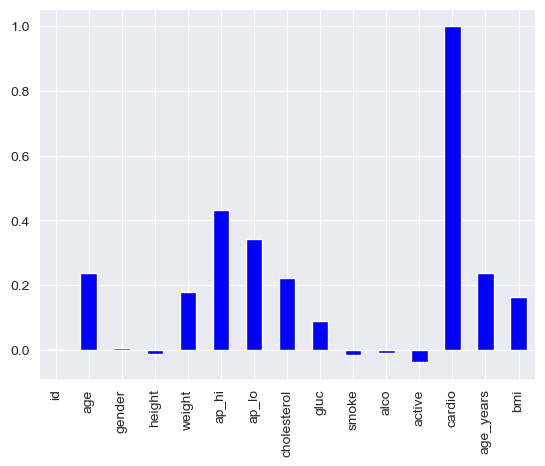

In [16]:
data.corrwith(data['cardio']).plot.bar(color='blue')

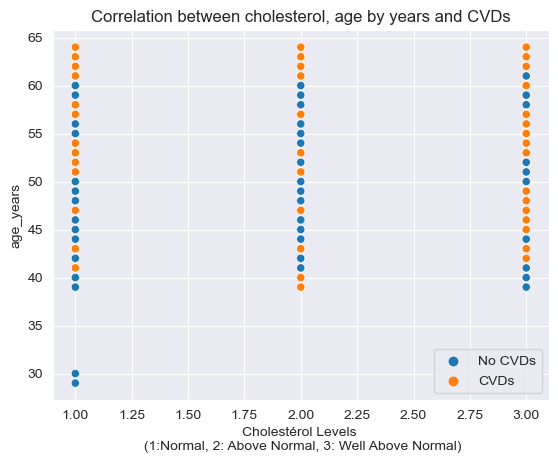

In [17]:
#Correlation between diabetes, age by years and CVDs or not
plt.title("Correlation between cholesterol, age by years and CVDs")
sb.scatterplot(data=data, x='gluc', y='age_years', hue='cardio')
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['No CVDs','CVDs']
plt.legend(handles, labels)
plt.xlabel('Cholestérol Levels \n (1:Normal, 2: Above Normal, 3: Well Above Normal)')
plt.show()

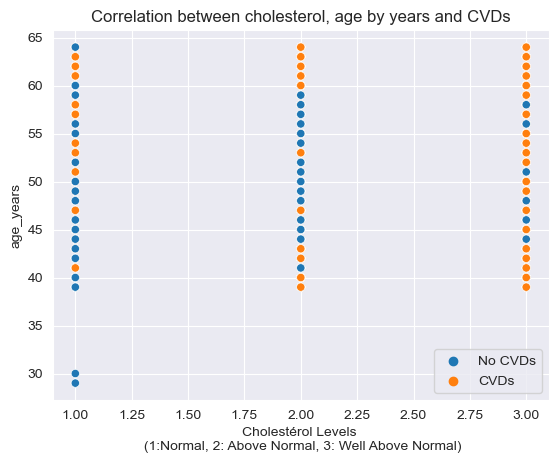

In [18]:
#Correlation between cholesterol, age by years and CVDs or not
plt.title("Correlation between cholesterol, age by years and CVDs")
sb.scatterplot(data=data, x='cholesterol', y='age_years', hue='cardio')
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['No CVDs','CVDs']
plt.legend(handles, labels)
plt.xlabel('Cholestérol Levels \n (1:Normal, 2: Above Normal, 3: Well Above Normal)')
plt.show()

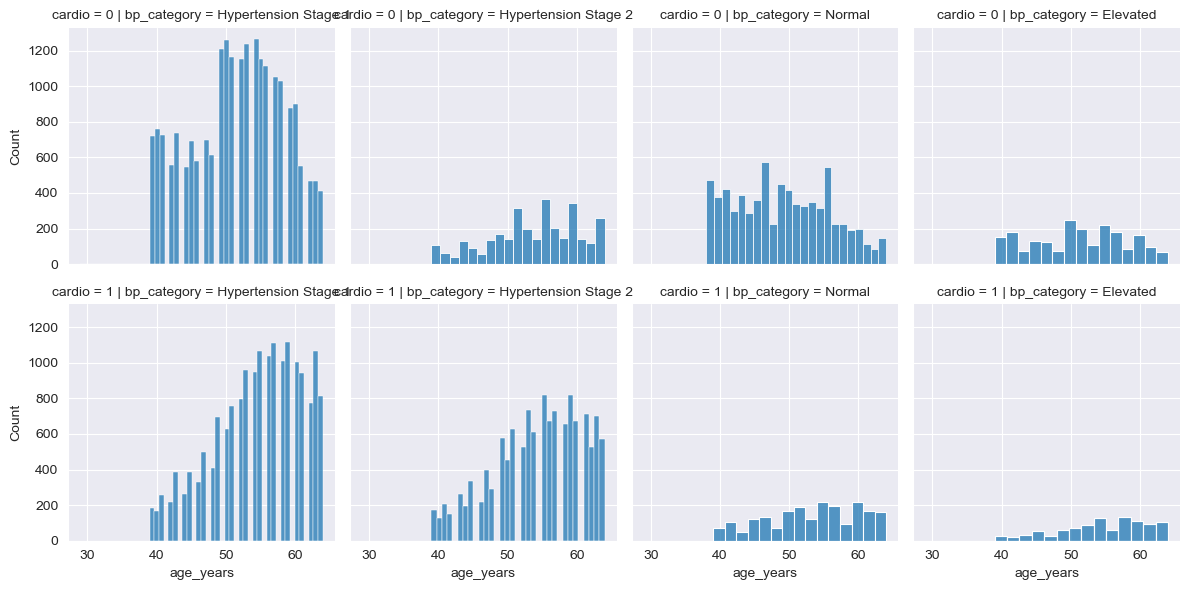

<Figure size 2000x1500 with 0 Axes>

In [19]:
#Visualising blood pressure category by age and CVDs
g = sb.FacetGrid(data, row='cardio', col='bp_category')
g.map(sb.histplot, "age_years")
plt.figure(figsize=(20,15))
plt.show()

## II. Deal with Missing, duplicates, Encode Categorical & Non-Categorical Features
In this dataset there is no missing values. I'll add a column for the non-categorical values, so I have a more understandable visualisations

## 1. Drop duplicates, id, age by day columns

In [20]:
data.drop_duplicates()
columns = data.columns
columns_to_drop = ["age","id"]
for col1 in range(len(columns)):
    for col2 in range(col1 + 1, len(columns)):
        if columns[col1] != columns[col2] and data.iloc[:, col1].equals(data.iloc[:, col2]):
            columns_to_drop.append(columns[col2])


# Delete the columns
data = data.drop(columns=columns_to_drop, axis=1)
shape = data.shape
print(shape)

(68205, 14)


## 2. Encode Categorical columns

In [21]:
#Numerising the bp_cat column
data['bp_category'] = data['bp_category'].replace(['Normal', 'Hypertension Stage 1', 'Hypertension Stage 2', 'Elevated', 'Hypertensive Crisis'], [0, 1, 2, 3, 4])
data['bp_category'].value_counts(normalize=True)

1    0.582802
2    0.233663
0    0.138069
3    0.045466
Name: bp_category, dtype: float64

In [22]:
data['bp_category'].unique()

array([1, 2, 0, 3], dtype=int64)

In [23]:
pd.get_dummies(data['bp_category'])

,0,1,2,3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
68200,0,1,0,0
68201,0,0,1,0
68202,0,0,1,0
68203,0,1,0,0


In [24]:
#adding column to categorise the individuals by there bmi
bins = [-float('inf'), 18, 24.9, 39.9, float('inf')]
labels = [1, 0, 2, 3] 
""" 0: Normal, 1: underweight, 2:overweight 3:Morbid Obesity"""
data['bmi_category'] = pd.cut(data['bmi'], bins=bins, labels=labels, right=False)
data['bmi_category'].value_counts(normalize=True)


2    0.608416
0    0.359138
3    0.026435
1    0.006011
Name: bmi_category, dtype: float64

## 3. Encode non-categorical columns

In [25]:
data['bmi_category'].value_counts()

2    41497
0    24495
3     1803
1      410
Name: bmi_category, dtype: int64

In [26]:
data['gender_name'] = data['gender'].replace([0,1], ['woman', 'man'])

In [27]:
#adding column to categorise the individuals by there age
bins = [0, 25, 40, 55, 70, float('inf')]
labels= ["<25", "26-40","41-55", "56-70", ">70"]

data['age_grp'] = pd.cut(data['age_years'], bins=bins, labels=labels, right=False)
data['age_grp']

0        41-55
1        56-70
2        41-55
3        41-55
4        41-55
         ...  
68200    41-55
68201    56-70
68202    41-55
68203    56-70
68204    56-70
Name: age_grp, Length: 68205, dtype: category
Categories (5, object): ['<25' < '26-40' < '41-55' < '56-70' < '>70']

## III. Deep Analyse Of The Data 

## 1. Individuals grouped by gender, age group and CVDs

In [28]:
data['gender_name'].value_counts()

woman    44427
man      23778
Name: gender_name, dtype: int64

In [29]:
data.groupby('gender_name').mean()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
gender_name,,,,,,,,,,,,,,
man,1.0,169.942468,77.148099,127.759736,82.090420,1.328581,1.208134,0.218227,0.105476,0.806376,0.497855,52.600639,26.715494,1.243923
woman,0.0,161.391924,72.469668,125.725865,80.821572,1.381795,1.234294,0.017782,0.025120,0.802035,0.491458,52.942985,27.936019,1.155806


In [30]:
data[data['cardio'] == 1].groupby('gender_name')['cardio'].value_counts()

gender_name  cardio
man          1         11838
woman        1         21834
Name: cardio, dtype: int64

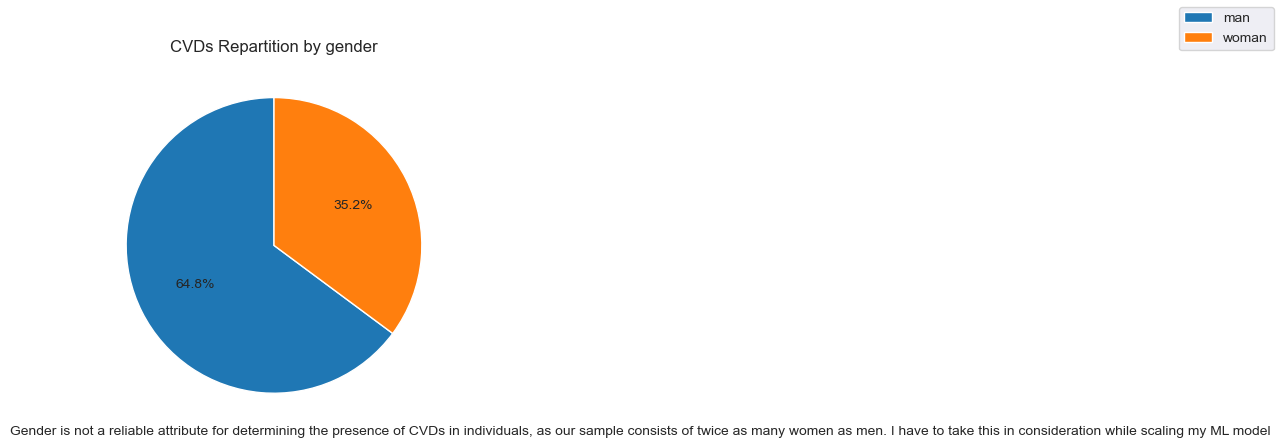

In [31]:
#CVDs by gender
CVDs_wom = data[(data['cardio']==1) & (data['gender']==0)]
CVDs_man = data[(data['cardio']==1) & (data['gender']==1)]
key = data['gender_name']
sizes = [len(CVDs_wom), len(CVDs_man)]
fig, ax = plt.subplots()
ax.pie(sizes, autopct='%1.1f%%', startangle=90)
fig.legend(key)
ax.set_title("CVDs Repartition by gender")
fig.text(0.1, 0.1,"Gender is not a reliable attribute for determining the presence of CVDs in individuals, as our sample consists of twice as many women as men. I have to take this in consideration while scaling my ML model")
plt.show()

In [32]:
data[data['cardio'] == 1].groupby('gender_name')['age_grp'].value_counts(normalize=True) * 100

gender_name       
man          56-70    51.892212
             41-55    46.671735
             26-40     1.436053
             <25       0.000000
             >70       0.000000
woman        56-70    55.944857
             41-55    42.919300
             26-40     1.135843
             <25       0.000000
             >70       0.000000
Name: age_grp, dtype: float64

## 2. Biomarkers for CVDs and none CVDS individuals

In [33]:
data.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,0.348625,164.372861,74.100688,126.434924,81.263925,1.363243,1.225174,0.087662,0.053134,0.803548,0.493688,52.823635,27.510513,1.186526
std,0.476539,8.176756,14.288862,15.961685,9.143985,0.678080,0.571288,0.282805,0.224302,0.397317,0.499964,6.769909,6.026497,0.720286
min,0.000000,55.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,3.471784,0.000000
25%,0.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115,1.000000
50%,0.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.346494,1.000000
75%,1.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.116213,2.000000
max,1.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,298.666667,3.000000


In [34]:
data[data['bmi']> 298]

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bmi_category,gender_name,age_grp
12451,0,75,168.0,120,80,1,1,1,0,1,1,53,298.666667,1,3,woman,41-55


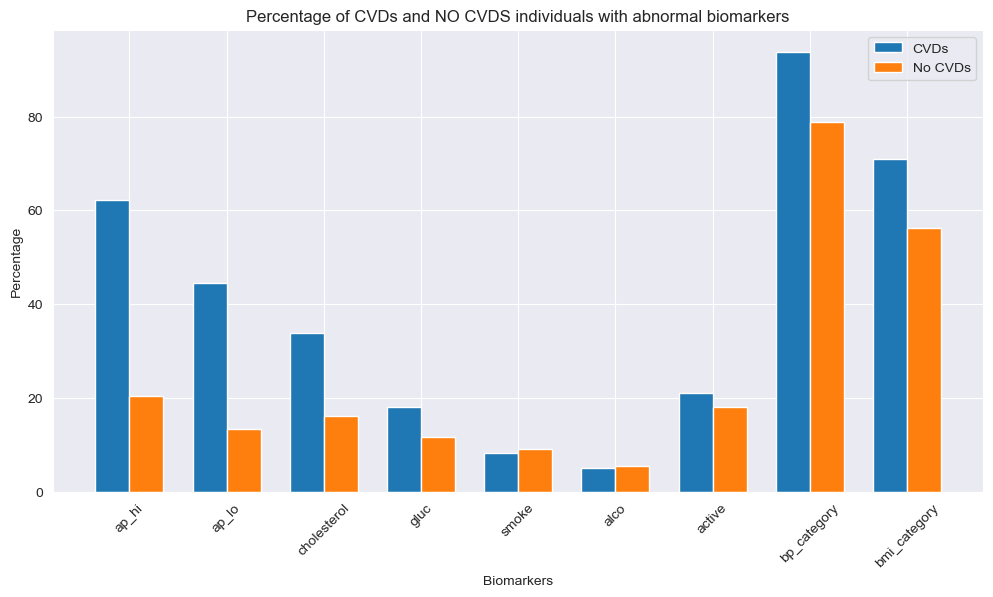

In [35]:
normal_biomarkers = {
    'ap_hi': 120,
    'ap_lo': 80,
    'cholesterol': 1,
    'gluc': 1,
    'smoke': 0,
    'alco': 0,
    'active': 1,
    'bmi_category': 0,
    'bp_category': 0,
}

# Total of individuals with or without CVDs
Nb_CVDs = len(data[data['cardio'] == 1])  # 
Nb_No_CVDs = len(data[data['cardio'] == 0])  # 

# Initialisation of lists to store percentage per column
CVDs_percentages = []
No_CVDs_percentages = []

# Calculating percentage of each column
for column in data.columns:
    if column in normal_biomarkers and column != 'cardio' and column != 'gender' and column != 'height' and column != 'weight' and column != 'age_years' and column != 'active':
        # Filtering data
        filtered_data_CVDs = data[(data[column] > normal_biomarkers[column]) & (data['cardio'] == 1)]
        filtered_data_No_CVDs = data[(data[column] > normal_biomarkers[column]) & (data['cardio'] == 0)]

        # Percentage for people with or without CVDs
        CVDs_percentage = (len(filtered_data_CVDs) / Nb_CVDs) * 100
        No_CVDs_percentage = (len(filtered_data_No_CVDs) / Nb_No_CVDs) * 100

        CVDs_percentages.append(CVDs_percentage)
        No_CVDs_percentages.append(No_CVDs_percentage)
    
    elif column == 'active':
        filtered_data_CVDs = data[(data[column] < normal_biomarkers['active']) & (data['cardio'] == 1)]
        filtered_data_No_CVDs = data[(data[column] < normal_biomarkers['active']) & (data['cardio'] == 0)]

    # Percentage for active people
        CVDs_percentage = (len(filtered_data_CVDs) / Nb_CVDs) * 100
        No_CVDs_percentage = (len(filtered_data_No_CVDs) / Nb_No_CVDs) * 100

        CVDs_percentages.append(CVDs_percentage)
        No_CVDs_percentages.append(No_CVDs_percentage)

# Visualisation with grouped bar chart with labels
x = np.arange(len(CVDs_percentages))  
width = 0.35  

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(x - width/2, CVDs_percentages, width, label='CVDs')
rects2 = ax.bar(x + width/2, No_CVDs_percentages, width, label='No CVDs')

ax.set_xlabel('Biomarkers')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of CVDs and NO CVDS individuals with abnormal biomarkers')
ax.set_xticks(x)
ax.set_xticklabels([col for col in data.columns if col in normal_biomarkers and col != 'cardio' and col != 'gender' and col != 'height' and col != 'weight' and col != 'age_years'], rotation=45)
ax.legend()

plt.show()


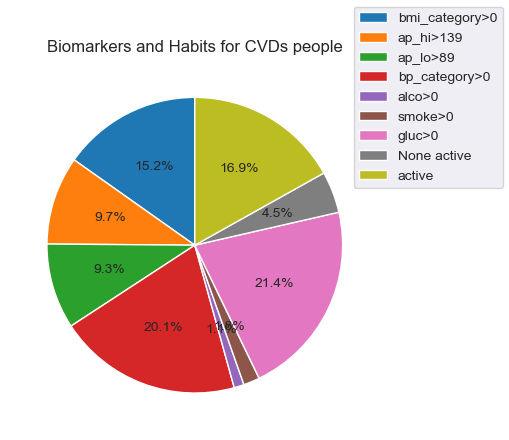

In [36]:
#Visualising biomarkers for CVDs people

filtered_data = data[data['cardio']==1]

markers = ['bmi_category', 'ap_hi', 'ap_lo', 'bp_category', 'alco', 'smoke', 'gluc']
normal = [0, 139, 89, 0, 0, 0, 0]

labels = []
sizes = []

for i, marker in enumerate(markers):
    label_filtering = filtered_data[filtered_data[marker] > normal[i]]
    sizes.append(len(label_filtering))
    labels.append(f"{marker}>{normal[i]}")
    
labels.append("None active")
sizes.append(len(filtered_data[filtered_data['active']==0]))
labels.append("active")
sizes.append(len(filtered_data[filtered_data['active']==1]))
fig, ax = plt.subplots()
ax.pie(sizes, autopct='%1.1f%%', startangle=90)
fig.legend(labels)
ax.set_title("Biomarkers and Habits for CVDs people")
plt.show()

## IV. Generate A Machine Learning Model

## 1. Split data into (X, y)

In [37]:

features = data.drop(['cardio', 'bmi_category', 'age_grp', 'gender_name'], axis=1)
X = data.drop(['cardio', 'bmi_category', 'age_grp', 'gender_name'], axis=1)
X.shape

(68205, 13)

In [38]:
y = data['cardio']
y.shape

(68205,)

In [39]:
#Sampling my classes
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_os, y_os = os.fit_resample(X, y)
X_os.shape, y_os.shape

((69066, 13), (69066,))

## 2. 2nd split (train & test)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_os,y_os, test_size=0.3, random_state=0)

## 3. Scaling the values

In [41]:
#Mean and Standard deviation calcul
#To standardize the data, So the standard deviation = 1
sc_train = StandardScaler().fit(X_train)
X_train_sc = sc_train.transform(X_train)
np.set_printoptions(precision=3)
print(X_train_sc[0:5,:])

[[-0.731 -0.538 -2.252 -1.038 -1.238 -0.535 -0.394 -0.307 -0.236  0.498
   1.06  -1.816 -1.656]
 [-0.731 -0.048 -0.291  0.84  -0.144  2.426 -0.394 -0.307 -0.236  0.498
  -0.568 -0.245 -0.267]
 [ 1.368  0.565  0.269 -0.412 -1.238 -0.535 -0.394  3.252 -0.236  0.498
  -1.457 -0.035  2.512]
 [-0.731  0.075 -0.641 -0.412 -0.144 -0.535 -0.394 -0.307 -0.236  0.498
  -0.124 -0.596 -0.267]
 [-0.731 -0.782 -0.571 -1.038 -1.238  0.946 -0.394 -0.307 -0.236  0.498
  -1.161 -0.177 -1.656]]


## 4. ML model and training

In [42]:
#LR because it's a Yes or No answer has the CVDs or not
model_lr = LogisticRegression(solver='liblinear')
#Use train data to train the model
model_lr.fit(X_train_sc, y_train)

LogisticRegression(solver='liblinear')

## 5. Testing the model 
Since the data were scaled we have to do the same fro test data

In [43]:
#Scaling test features
sc_test = StandardScaler().fit(X_test)
X_test_sc = sc_test.transform(X_test)

In [44]:
#Model performance testing on new data for the model
results = model_lr.score(X_test_sc, y_test)
results*100

72.71718146718146

In [45]:
# Performance for training data has to be superior to testing one
results = model_lr.score(X_train_sc, y_train)
results*100

72.73197368965376

## V. Model optimization

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   gender        68205 non-null  int64   
 1   height        68205 non-null  int64   
 2   weight        68205 non-null  float64 
 3   ap_hi         68205 non-null  int64   
 4   ap_lo         68205 non-null  int64   
 5   cholesterol   68205 non-null  int64   
 6   gluc          68205 non-null  int64   
 7   smoke         68205 non-null  int64   
 8   alco          68205 non-null  int64   
 9   active        68205 non-null  int64   
 10  cardio        68205 non-null  int64   
 11  age_years     68205 non-null  int64   
 12  bmi           68205 non-null  float64 
 13  bp_category   68205 non-null  int64   
 14  bmi_category  68205 non-null  category
 15  gender_name   68205 non-null  object  
 16  age_grp       68205 non-null  category
dtypes: category(2), float64(2), int64(12), object(1)
m

## 1. Cross Validation (resampling)
separating data into train and test 10 times  K folds method

In [47]:
kfold = KFold(n_splits = 10, random_state=7,   shuffle=True)
lr_2 = LogisticRegression(solver='liblinear')


In [48]:
#Scoring by Default is none
results = cross_val_score(lr_2, X_train_sc, y_train, cv=kfold)
results

array([0.718, 0.721, 0.73 , 0.728, 0.725, 0.739, 0.728, 0.72 , 0.729,
       0.732])

In [49]:
# Score and deviation using CV Kfolds
results.mean()*100, results.std()*100

(72.68853762922834, 0.5880507296773936)

In [50]:
## Using the CV kfold and AUC Scoring = The Percentage of accurately predicted outcomes among all predictions.
results2 = cross_val_score(lr_2, X_train_sc, y_train, cv=kfold, scoring='roc_auc')
results2

array([0.785, 0.79 , 0.797, 0.797, 0.785, 0.795, 0.795, 0.786, 0.783,
       0.795])

In [51]:
# Score and deviation using CV Kfolds and scoring accuracy
results2.mean()*100, results2.std()*100

(79.08450998432095, 0.5409513068683698)

## 2.Confusion matrix and report

<AxesSubplot:>

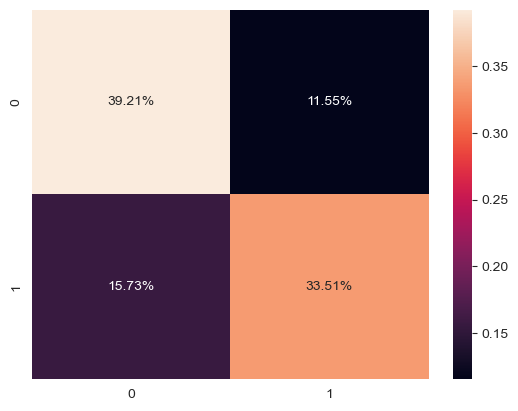

In [52]:
#The values in the diagonal indicate true values, for example, 'NOCVDs = 0' was predicted correctly, with the percentage shown in the top-left, and 'CVDs' in the bottom-right.
pred_y = model_lr.predict(X_test_sc)
matrix = confusion_matrix(y_test, pred_y)
sb.heatmap(matrix/np.sum(matrix), fmt='.2%', annot=True)

In [53]:
"""precision the rate among all data predicted, Recall = true positive rate between false and true, F1-score harmonic mean of precision and recall it gives the accuracy, macro avgThe average of the precision, recall, and F1-score calculated separately for each class. Weighted avg  of precision, recall, and F1-score, weighted by the number of true instances for each class. Support: Indicates the number of actual occurrences of each class in the test set."""

report = classification_report(y_test, pred_y)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.77      0.74     10517
           1       0.74      0.68      0.71     10203

    accuracy                           0.73     20720
   macro avg       0.73      0.73      0.73     20720
weighted avg       0.73      0.73      0.73     20720


# Conclusion :
This notebook conducted a simple Exploratory Data Analysis (EDA) to predict Cardiovascular Diseases (CVDs). A Logistic Regression model was employed for the Machine Learning task, achieving an accuracy of approximately 73%. I believe that for enhancing my model's performance, sampling based on gender could be a potential strategy.

In [54]:
data.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bmi_category,gender_name,age_grp
0,1,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,1,0,man,41-55
1,0,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,2,2,woman,56-70
2,0,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,1,0,woman,41-55
3,1,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,2,2,man,41-55
4,0,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,0,0,woman,41-55


In [55]:
dataExport = data.drop(['bp_category','bmi_category', 'gender_name', 'age_grp'], axis=1)
dataExport.to_csv('CSV Data clean/Dataset 17.csv', index=False)

OSError: Cannot save file into a non-existent directory: 'CSV Data clean'